In [1]:
from pandas import read_csv
from numpy import array
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report
from matplotlib.pyplot import subplots, show
from joblib import dump
from os.path import basename

In [2]:
list_target = ['sharp', 'defocused_blurred', 'motion_blurred', 'blur', 'band', 'noise', 'exposure', 'glare', 'dark', 'constant']
dict_target = {k: j for j, k in enumerate(list_target)}
dict_target

{'sharp': 0,
 'defocused_blurred': 1,
 'motion_blurred': 2,
 'blur': 3,
 'band': 4,
 'noise': 5,
 'exposure': 6,
 'glare': 7,
 'dark': 8,
 'constant': 9}

In [3]:
df = read_csv("df_public.csv")
array_number = array([int(basename(x).split("_")[0]) for x in df["path"]])
x = df.loc[:, ~df.columns.isin(("target", "dataset", "path"))]
y = df["target"].replace(dict_target).values
id_ths = 250
x_train = x.loc[array_number <= id_ths, :]
y_train = y[array_number <= id_ths]
x_test = x.loc[array_number > id_ths, :]
y_test = y[array_number > id_ths]

In [4]:
model = XGBClassifier(n_estimators=500, objective='binary:logistic', seed=1102)
model.fit(x_train, y_train)
print(
    classification_report(
        y_test, model.predict(x_test), 
        target_names=list_target
    )
)

                   precision    recall  f1-score   support

            sharp       0.86      0.91      0.88        99
defocused_blurred       0.63      0.63      0.63        99
   motion_blurred       0.67      0.58      0.62        99
             blur       0.95      0.97      0.96        99
             band       0.88      0.84      0.86        99
            noise       0.96      1.00      0.98        99
         exposure       1.00      1.00      1.00        99
            glare       0.96      0.96      0.96        99
             dark       0.93      1.00      0.97        99
         constant       1.00      1.00      1.00        99

         accuracy                           0.89       990
        macro avg       0.88      0.89      0.89       990
     weighted avg       0.88      0.89      0.89       990



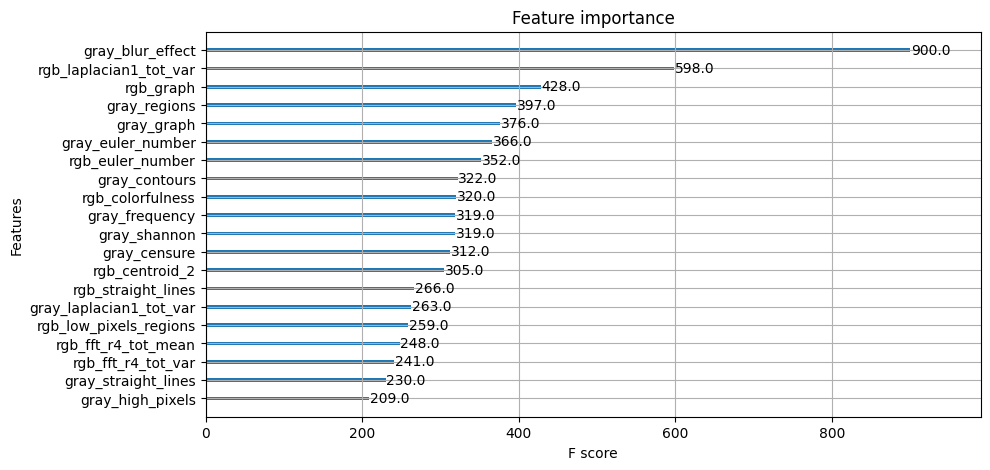

In [5]:
fig, ax = subplots(figsize=(10, 5))
plot_importance(model, max_num_features=20, ax=ax)
show()

In [6]:
dump(model, 'model_xgboost_multi.joblib') 

['model_xgboost_multi.joblib']

In [7]:
model = XGBClassifier(n_estimators=500, objective='binary:logistic', seed=1102)
model.fit(x_train, y_train > 0)
print(
    classification_report(
        y_test > 0, model.predict(x_test), 
        target_names=["Good photos", "Bad photos"]
    )
)

              precision    recall  f1-score   support

 Good photos       0.89      0.92      0.91        99
  Bad photos       0.99      0.99      0.99       891

    accuracy                           0.98       990
   macro avg       0.94      0.95      0.95       990
weighted avg       0.98      0.98      0.98       990

